## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df_clean = application_df.drop(columns = ['EIN'], axis=1)
application_df_clean

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df_clean.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df_clean['APPLICATION_TYPE'].value_counts()
application_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace
application_types_to_replace = list(application_count[application_count<400].index)
application_types_to_replace


# # Replace in dataframe
for app in application_types_to_replace:
    application_df_clean['APPLICATION_TYPE'] = application_df_clean['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df_clean['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df_clean['CLASSIFICATION'].value_counts()
classification_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count_h1 =classification_count[classification_count>1]
classification_count_h1

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count[classification_count<1000].index)
classifications_to_replace

# Replace in dataframe
for cls in classifications_to_replace:
    application_df_clean['CLASSIFICATION'] = application_df_clean['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df_clean['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_model = pd.get_dummies(application_df_clean)
application_df_model

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34295,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34296,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34297,1,5000,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [10]:
# Split our preprocessed data into our features and target arrays
X = application_df_model.drop('IS_SUCCESSFUL',axis =1)
y =application_df_model['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state =42)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled.shape

(25724, 19611)

## Optimization of the Model

In [12]:
num_features = X_train_scaled.shape[1]

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid','linear'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=50,
        max_value=100,
        step=5), activation=activation, input_dim=num_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model


In [13]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=10,
    hyperband_iterations=2)

c:\Users\nigro\anaconda3\envs\mnpy39\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs = 10,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 03m 51s]
val_accuracy: 0.7979008555412292

Best val_accuracy So Far: 0.800000011920929
Total elapsed time: 02h 27m 09s


In [19]:
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'sigmoid', 'first_units': 70, 'num_layers': 3, 'units_0': 16, 'units_1': 6, 'units_2': 16, 'units_3': 1, 'units_4': 6, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}
{'activation': 'linear', 'first_units': 55, 'num_layers': 3, 'units_0': 6, 'units_1': 6, 'units_2': 16, 'units_3': 21, 'units_4': 16, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}
{'activation': 'sigmoid', 'first_units': 60, 'num_layers': 4, 'units_0': 16, 'units_1': 26, 'units_2': 6, 'units_3': 26, 'units_4': 6, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [20]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

c:\Users\nigro\anaconda3\envs\mnpy39\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\nigro\anaconda3\envs\mnpy39\lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
c:\Users\nigro\anaconda3\envs\mnpy39\lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


268/268 - 1s - 3ms/step - accuracy: 0.8000 - loss: 0.4844
Loss: 0.48441725969314575, Accuracy: 0.800000011920929
268/268 - 1s - 3ms/step - accuracy: 0.7987 - loss: 0.4442
Loss: 0.4441733658313751, Accuracy: 0.798717200756073
268/268 - 1s - 3ms/step - accuracy: 0.7979 - loss: 0.5393
Loss: 0.5393334031105042, Accuracy: 0.7979008555412292


In [50]:
top_model = tuner.get_best_models(1)[0]


c:\Users\nigro\anaconda3\envs\mnpy39\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\nigro\anaconda3\envs\mnpy39\lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [25]:
second_hyper = tuner.get_best_hyperparameters(2)[1]
second_hyper.values

{'activation': 'linear',
 'first_units': 55,
 'num_layers': 3,
 'units_0': 6,
 'units_1': 6,
 'units_2': 16,
 'units_3': 21,
 'units_4': 16,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [51]:
# Get the list of layers in the model
layers = top_model.layers

# Iterate over each layer and print its activation function
for layer in layers:
    if hasattr(layer, 'units'):
        print("Number of Units:", layer.units)
    print("Layer Name:", layer.name)
    print("Activation Function:", layer.activation.__name__)

Number of Units: 70
Layer Name: dense
Activation Function: sigmoid
Number of Units: 16
Layer Name: dense_1
Activation Function: sigmoid
Number of Units: 6
Layer Name: dense_2
Activation Function: sigmoid
Number of Units: 16
Layer Name: dense_3
Activation Function: sigmoid
Number of Units: 1
Layer Name: dense_4
Activation Function: sigmoid


In [52]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = X_train_scaled.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units =70, activation='sigmoid', input_dim = num_features))

#  hidden layer
nn.add(tf.keras.layers.Dense(units =16, activation='sigmoid'))
nn.add(tf.keras.layers.Dense(units =6, activation='sigmoid'))
nn.add(tf.keras.layers.Dense(units = 16, activation='sigmoid'))


# Output layer
nn.add(tf.keras.layers.Dense(units =1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

c:\Users\nigro\anaconda3\envs\mnpy39\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 70)             │     1,372,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,374,207 (5.24 MB)

 Trainable params: 1,374,207 (5.24 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
nn.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5628 - loss: 0.6821
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9259 - loss: 0.2754
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9617 - loss: 0.1286
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9613 - loss: 0.1063
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9628 - loss: 0.0971
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9625 - loss: 0.0963
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9644 - loss: 0.0928
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9646 - loss: 0.0878
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9642 - loss: 0.0881
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9646 - loss: 0.0871
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9655 - loss: 0.0849
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━

In [55]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 5ms/step - accuracy: 0.7868 - loss: 0.5063
Loss: 0.5063401460647583, Accuracy: 0.7868221402168274


<Axes: >

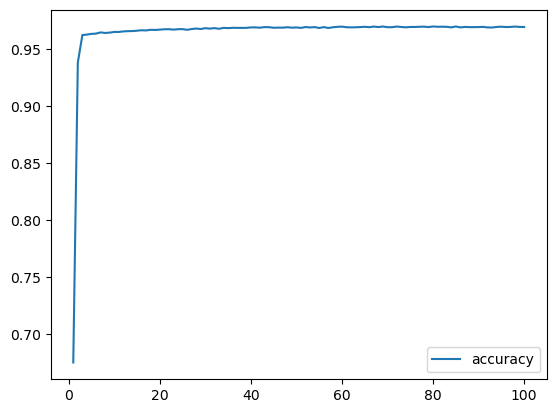

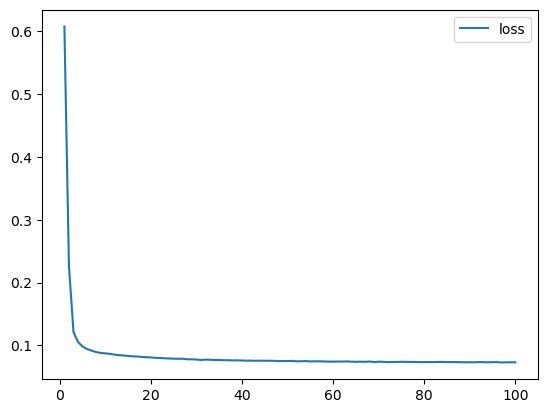

In [58]:
# plotting the accuracy and loss
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')
history_df.plot(y = 'loss')

In [56]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization.h5')